In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import seaborn as sns
sns.set_style('darkgrid')

In [3]:
results_lst = os.listdir("percomb_runs")

df = pd.read_csv("percomb_runs/" + results_lst[0])
df = df.drop('Unnamed: 0',axis=1)

df['temp'] = df['Learning Rate']
df['Learning Rate'] = df['Colsample By Tree']
df['Colsample By Tree'] = df['temp']
#print(df)
curr_df = df[df['Colsample By Tree'] == 0.5]
print(curr_df)

    Num  Max Depth  N_estimators  Colsample By Tree  Learning Rate  Accuracy  \
3     3          3            50                0.5          0.100  0.546798   
4     4          3            50                0.5          0.010  0.472906   
5     5          3            50                0.5          0.001  0.433498   
12   12          3           100                0.5          0.100  0.674877   
13   13          3           100                0.5          0.010  0.458128   
14   14          3           100                0.5          0.001  0.423645   
21   21          3           150                0.5          0.100  0.714286   
22   22          3           150                0.5          0.010  0.467980   
23   23          3           150                0.5          0.001  0.423645   
30   30          4            50                0.5          0.100  0.571429   
31   31          4            50                0.5          0.010  0.522167   
32   32          4            50        

combined_results_xgb_maternal.csv
xgb
F1 Score


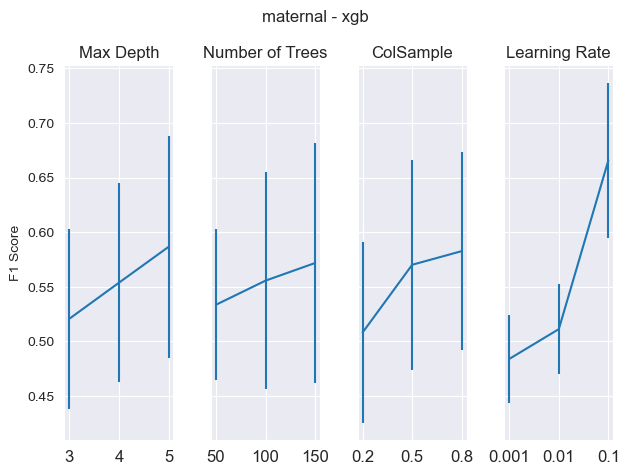

Energy (J)


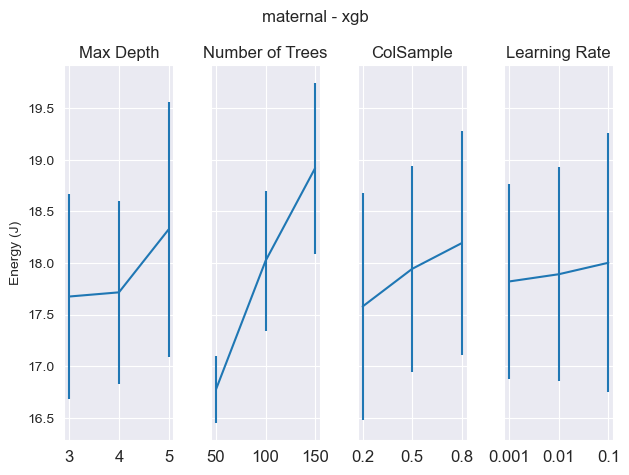

combined_results_rf_winequality.csv
rf
MSE


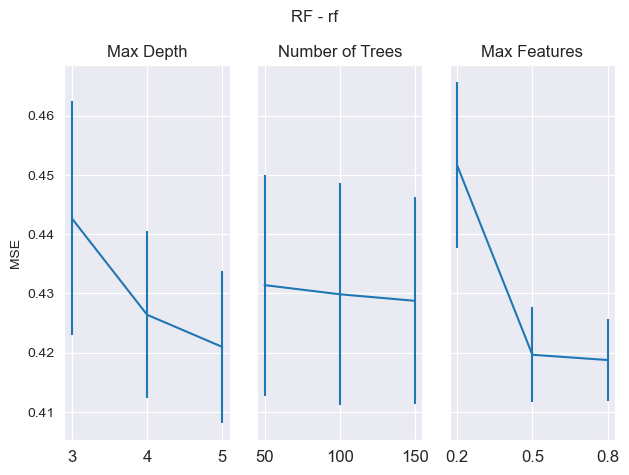

Energy (J)


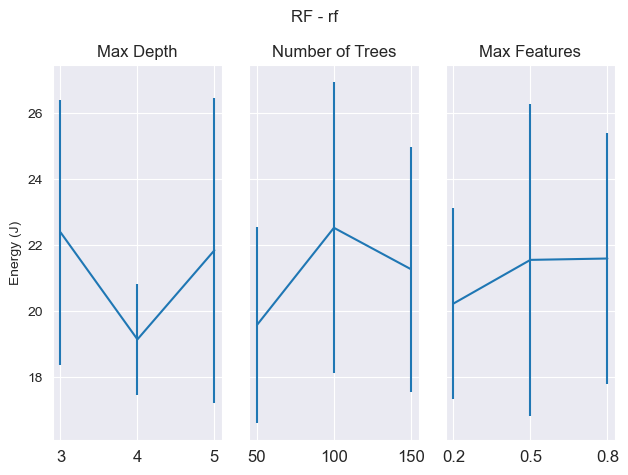

combined_results_rf_bank.csv
rf
F1 Score


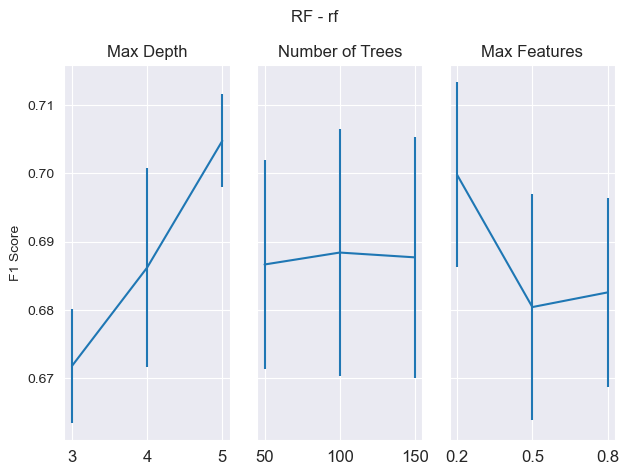

Energy (J)


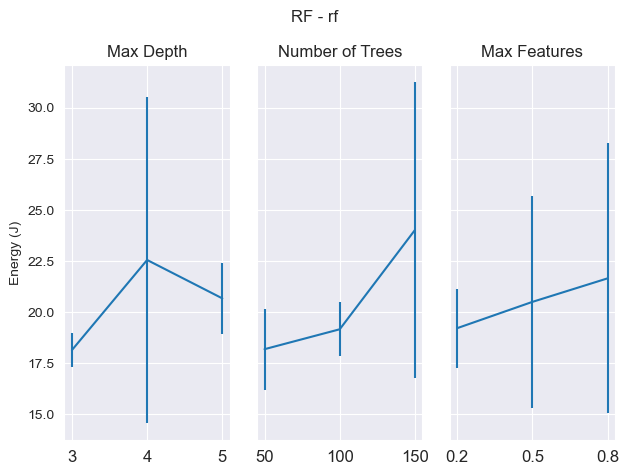

combined_results_xgb_bank.csv
xgb
F1 Score


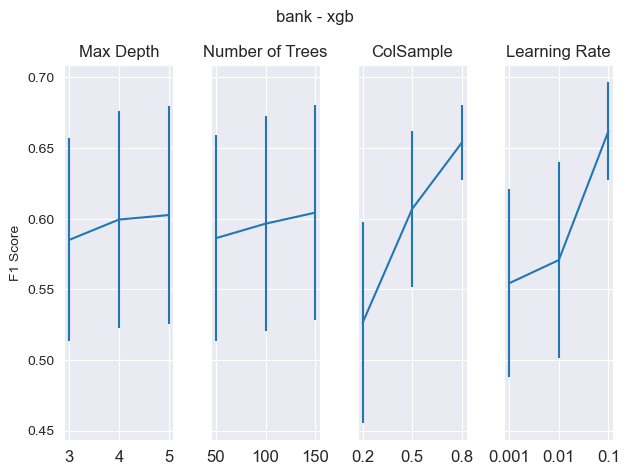

Energy (J)


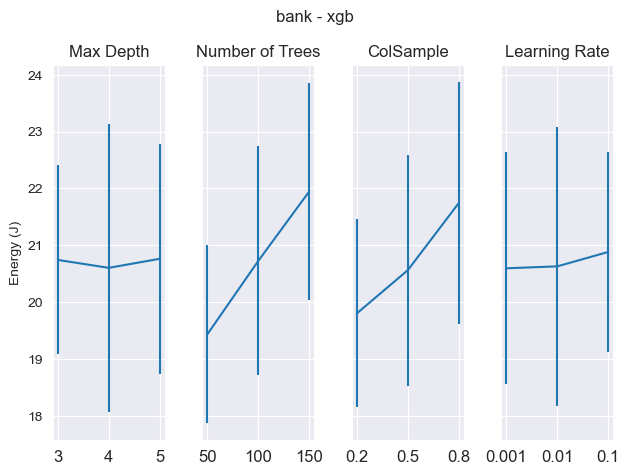

combined_results_xgb_winequality.csv
xgb
MSE


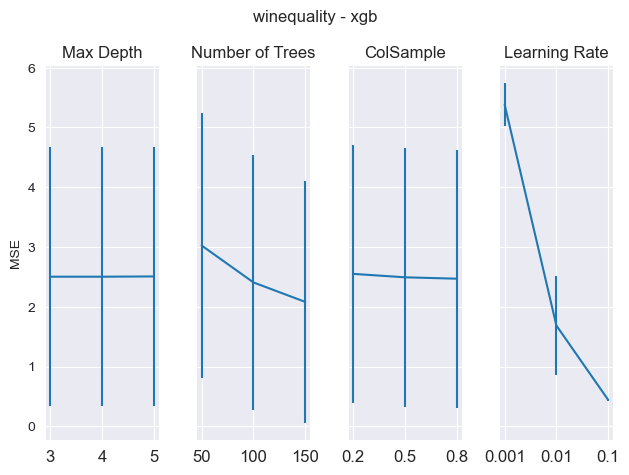

Energy (J)


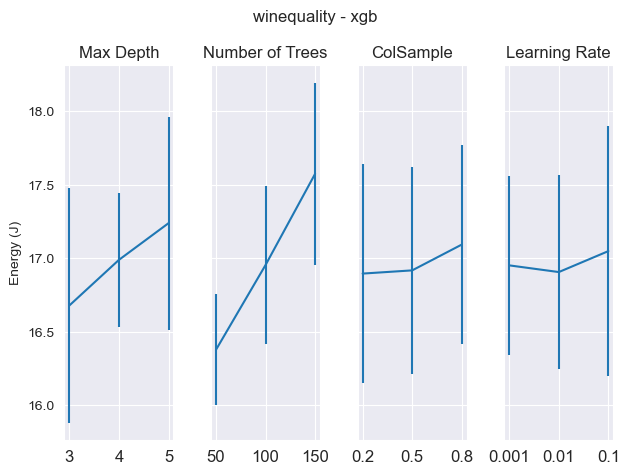

combined_results_rf_maternal.csv
rf
F1 Score


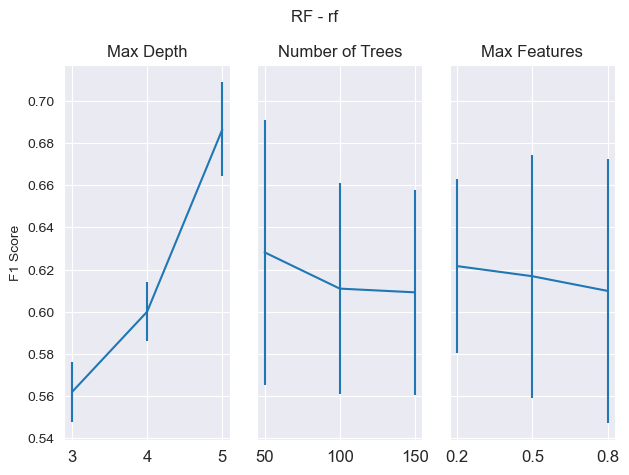

Energy (J)


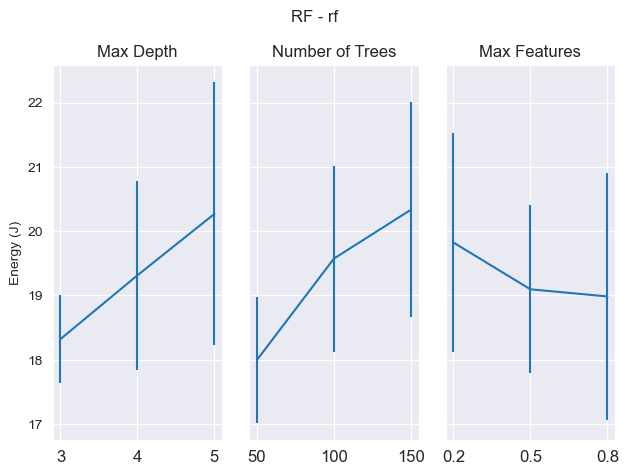

In [4]:
# scatter plot of exp results, where experiments are color coded based on the learning rate
# disregard the colsample by tree name; it's because the column names were swapped when file was generated
# confirms that LR = 0.1 

import matplotlib.pyplot as plt


for i in range(len(results_lst)):
    filename = results_lst[i]
    print(filename)
    dataset_name = filename.strip('.csv').split('_')[-2]
    print(dataset_name)
    if 'winequality' in filename:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
    model_name = filename.strip('.csv').split('_')[-1] 
    
        
    for m in [metric, 'Energy (J)']:
        print(m)
        if 'rf' in filename:
            
            fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True)
            axs = axs.flatten()
        
            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)
            
            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            max_feat = [0.2, 0.5, 0.8]
          
            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[0].errorbar(range(len(depths)), means, yerr=stds)
            axs[0].set_title('Max Depth')
            axs[0].set_xticks([0, 1, 2]) 
            axs[0].set_xticklabels(depths, fontsize=12)
            axs[0].set_ylabel(m)
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["n_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
                
            axs[1].errorbar(range(len(depths)), means, yerr=stds)
            axs[1].set_title('Number of Trees')
            axs[1].set_xticks([0, 1, 2]) 
            axs[1].set_xticklabels(N_estims, fontsize=12)

            means = []
            stds = []
            for f in max_feat:
                curr_df = df[df["Max Features"] == f]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[2].errorbar(range(len(depths)), means, yerr=stds)
            axs[2].set_title('Max Features')
            axs[2].set_xticks([0, 1, 2]) 
            axs[2].set_xticklabels(max_feat, fontsize=12)

            plt.suptitle('RF - {0}'.format(dataset_name))
            plt.tight_layout()
            plt.show()
            #plt.savefig('loveland_imgs/rf_{0}_{1}_idv.png'.format(dataset_name, m))
        
        elif 'xgb' in filename:
            
            
            fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True)
            axs = axs.flatten()
        
            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)

            df['temp'] = df['Learning Rate']
            df['Learning Rate'] = df['Colsample By Tree']
            df['Colsample By Tree'] = df['temp']

            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            Colsampl = [0.2, 0.5, 0.8]
            lr = [0.001, 0.01, 0.1]

            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[0].errorbar(range(len(depths)), means, yerr=stds)
            axs[0].set_title('Max Depth')
            axs[0].set_xticks([0, 1, 2]) 
            axs[0].set_xticklabels(depths, fontsize=12)
            axs[0].set_ylabel(m)
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["N_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
                
            axs[1].errorbar(range(len(depths)), means, yerr=stds)
            axs[1].set_title('Number of Trees')
            axs[1].set_xticks([0, 1, 2]) 
            axs[1].set_xticklabels(N_estims, fontsize=12)

            means = []
            stds = []
            for c in Colsampl:
                curr_df = df[df["Colsample By Tree"] == c]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
            axs[2].errorbar(range(len(depths)), means, yerr=stds)
            axs[2].set_title('ColSample')
            axs[2].set_xticks([0, 1, 2]) 
            axs[2].set_xticklabels(Colsampl, fontsize=12)

            means = []
            stds = []
            for l in lr:
                curr_df = df[df["Learning Rate"] == l]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[3].errorbar(range(len(depths)), means, yerr=stds)
            axs[3].set_title('Learning Rate')
            axs[3].set_xticks([0, 1, 2]) 
            axs[3].set_xticklabels(lr, fontsize=12)

            plt.suptitle('{1} - {0}'.format(dataset_name, model_name))
            plt.tight_layout()
            plt.show()
        #plt.savefig('loveland_imgs/xgb_{0}_{1}_idv.png'.format(dataset_name, m))
        plt.close()

combined_results_xgb_maternal.csv
maternal
F1 Score
combined_results_rf_winequality.csv
winequality
MSE
combined_results_rf_bank.csv
bank
F1 Score
combined_results_xgb_bank.csv
bank
F1 Score
combined_results_xgb_winequality.csv
winequality
MSE
combined_results_rf_maternal.csv
maternal
F1 Score


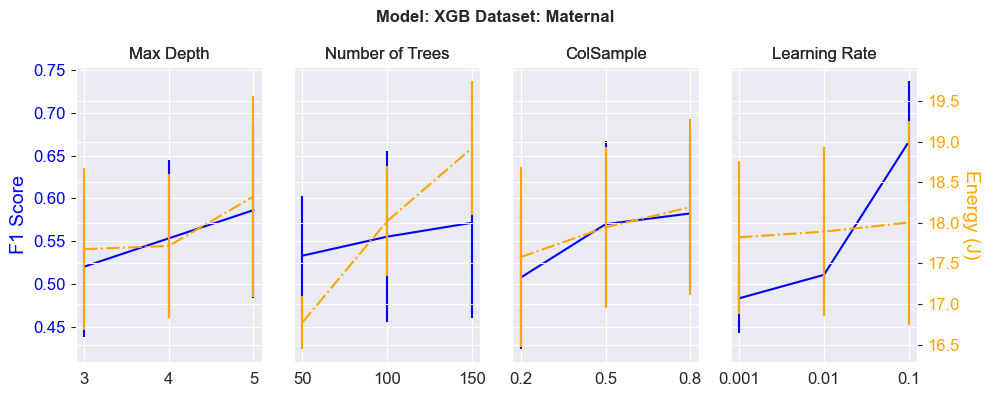

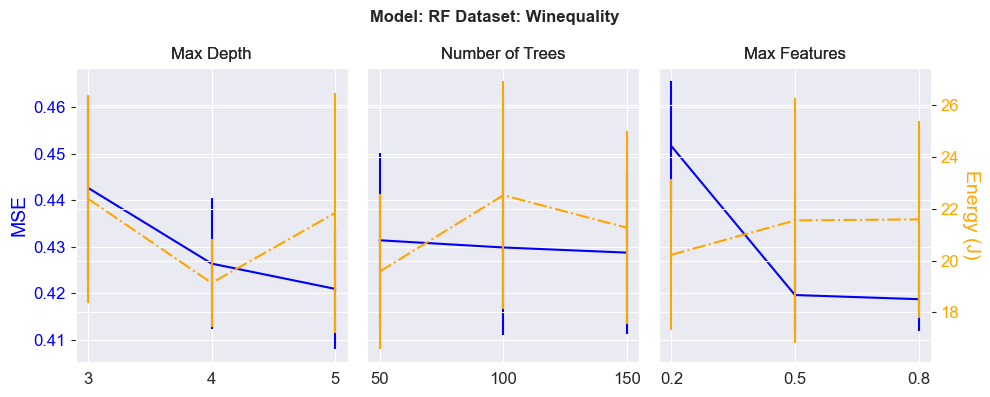

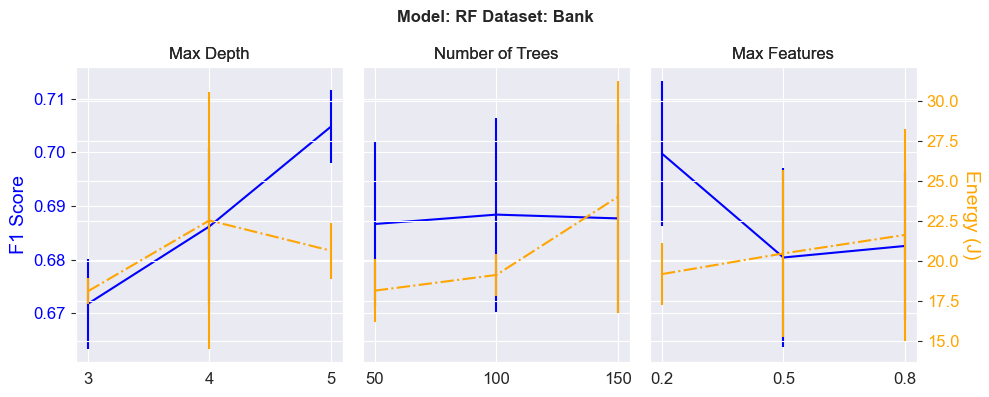

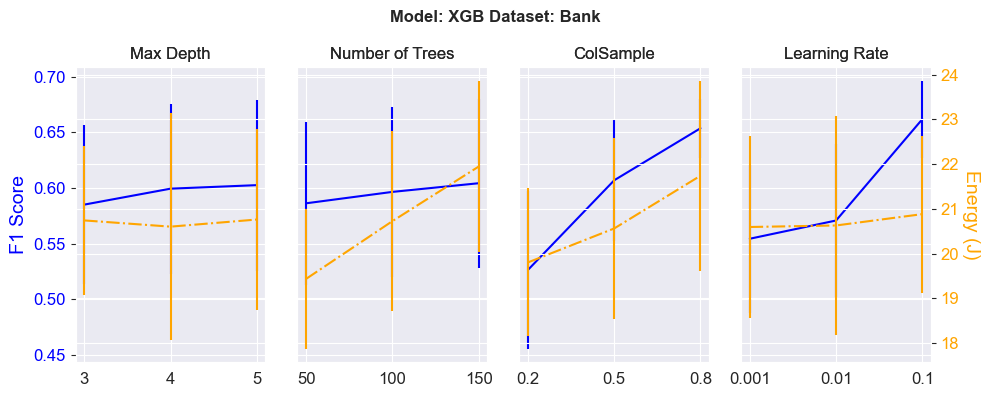

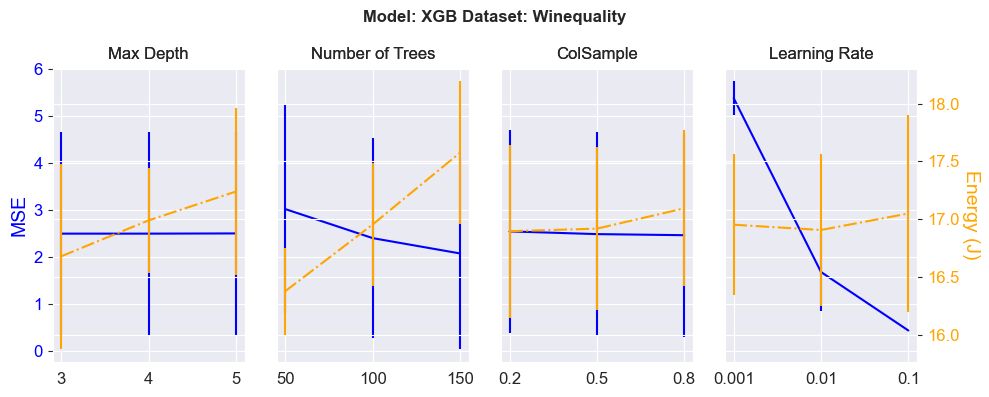

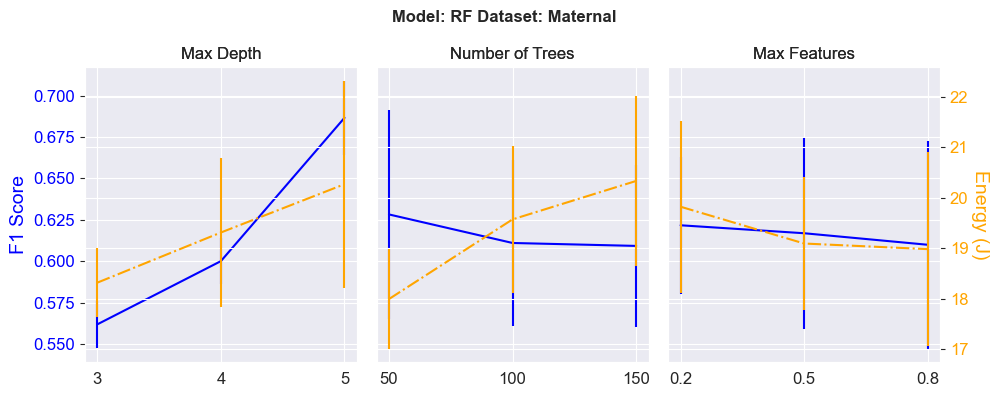

In [35]:
# scatter plot of exp results, where experiments are color coded based on the learning rate
# disregard the colsample by tree name; it's because the column names were swapped when file was generated
# confirms that LR = 0.1 

import matplotlib.pyplot as plt


for i in range(len(results_lst)):
    filename = results_lst[i]
    print(filename)
    dataset_name = filename.strip('.csv').split('_')[-1]
    print(dataset_name)
    if 'winequality' in filename:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
    model_name = filename.strip('.csv').split('_')[-2] 
    if 'rf' in filename:
        fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10, 4))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(10, 4))
        axs = axs.flatten()
        
    for m in [metric]:
        print(m)
        if 'rf' in filename:
            
            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)
            
            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            max_feat = [0.2, 0.5, 0.8]
          
            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[0].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[0].set_title('Max Depth')
            axs[0].set_xticks([0, 1, 2]) 
            axs[0].set_xticklabels(depths, fontsize=12)
            axs[0].set_ylabel(m, fontsize=14)
            axs[0].yaxis.label.set_color('blue')
            axs[0].tick_params(axis="y", labelcolor='blue', labelsize=12)
            
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["n_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
                
            axs[1].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[1].set_title('Number of Trees')
            axs[1].set_xticks([0, 1, 2]) 
            axs[1].set_xticklabels(N_estims, fontsize=12)
            axs[1].tick_params(axis="y", labelcolor='blue')
            means = []
            stds = []
            for f in max_feat:
                curr_df = df[df["Max Features"] == f]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[2].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[2].set_title('Max Features')
            axs[2].set_xticks([0, 1, 2]) 
            axs[2].set_xticklabels(max_feat, fontsize=12)
            axs[2].tick_params(axis="y", labelcolor='blue')
            #plt.suptitle('RF - {0}'.format(dataset_name))
            #plt.tight_layout()
            #plt.savefig('loveland_imgs/rf_{0}_{1}_idv.png'.format(dataset_name, m))
        
        elif 'xgb' in filename:
            
            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)

            df['temp'] = df['Learning Rate']
            df['Learning Rate'] = df['Colsample By Tree']
            df['Colsample By Tree'] = df['temp']

            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            Colsampl = [0.2, 0.5, 0.8]
            lr = [0.001, 0.01, 0.1]

            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[0].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[0].set_title('Max Depth')
            axs[0].set_xticks([0, 1, 2]) 
            axs[0].set_xticklabels(depths, fontsize=12)
            axs[0].set_ylabel(m, fontsize=14)
            axs[0].yaxis.label.set_color('blue')
            axs[0].tick_params(axis="y", labelcolor='blue', labelsize=12)
            
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["N_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
                
            axs[1].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[1].set_title('Number of Trees')
            axs[1].set_xticks([0, 1, 2]) 
            axs[1].set_xticklabels(N_estims, fontsize=12)
            axs[1].tick_params(axis="y", labelcolor='blue')
            means = []
            stds = []
            for c in Colsampl:
                curr_df = df[df["Colsample By Tree"] == c]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
            axs[2].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[2].set_title('ColSample')
            axs[2].set_xticks([0, 1, 2]) 
            axs[2].set_xticklabels(Colsampl, fontsize=12)
            axs[2].tick_params(axis="y", labelcolor='blue')
            means = []
            stds = []
            for l in lr:
                curr_df = df[df["Learning Rate"] == l]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            axs[3].errorbar(range(len(depths)), means, yerr=stds, color='blue')
            axs[3].set_title('Learning Rate')
            axs[3].set_xticks([0, 1, 2]) 
            axs[3].set_xticklabels(lr, fontsize=12)
            axs[3].tick_params(axis="y", labelcolor='blue')
          
    linestyle = '-.'
    t_axs = [ax.twinx() for ax in axs]
    if 'xgb' in filename:
        t_axs[0].get_shared_y_axes().join(t_axs[0], t_axs[1], t_axs[2], t_axs[3])
    else:
        t_axs[0].get_shared_y_axes().join(t_axs[0], t_axs[1], t_axs[2])
    for m in ['Energy (J)']:
        if 'rf' in filename:
            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)

            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            max_feat = [0.2, 0.5, 0.8]

            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[0].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[0].set_title('Max Depth')
            t_axs[0].set_xticks([0, 1, 2]) 
            t_axs[0].set_xticklabels(depths, fontsize=12)
            
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["n_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[1].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[1].set_title('Number of Trees')
            t_axs[1].set_xticks([0, 1, 2]) 
            t_axs[1].set_xticklabels(N_estims, fontsize=12)

            means = []
            stds = []
            for f in max_feat:
                curr_df = df[df["Max Features"] == f]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[2].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[2].set_title('Max Features')
            t_axs[2].set_xticks([0, 1, 2]) 
            t_axs[2].set_xticklabels(max_feat, fontsize=12)
            t_axs[2].set_ylabel(m, rotation=270, labelpad=15, fontsize=14)
            t_axs[2].yaxis.label.set_color('orange')
            t_axs[2].tick_params(axis="y", labelcolor='orange', labelsize=12)
            #plt.suptitle('RF - {0}'.format(dataset_name))
            #plt.tight_layout()
            #plt.savefig('loveland_imgs/rf_{0}_{1}_idv.png'.format(dataset_name, m))

        elif 'xgb' in filename:

            df = pd.read_csv("percomb_runs/" + filename)
            df = df.drop('Unnamed: 0',axis=1)

            df['temp'] = df['Learning Rate']
            df['Learning Rate'] = df['Colsample By Tree']
            df['Colsample By Tree'] = df['temp']

            depths = [3, 4, 5]
            N_estims = [50, 100, 150]
            Colsampl = [0.2, 0.5, 0.8]
            lr = [0.001, 0.01, 0.1]

            means = []
            stds = []
            for d in depths:
                curr_df = df[df["Max Depth"] == d]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[0].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[0].set_title('Max Depth')
            t_axs[0].set_xticks([0, 1, 2]) 
            t_axs[0].set_xticklabels(depths, fontsize=12)
         
            means = []
            stds = []
            for n in N_estims:
                curr_df = df[df["N_estimators"] == n]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[1].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[1].set_title('Number of Trees')
            t_axs[1].set_xticks([0, 1, 2]) 
            t_axs[1].set_xticklabels(N_estims, fontsize=12)

            means = []
            stds = []
            for c in Colsampl:
                curr_df = df[df["Colsample By Tree"] == c]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))
            t_axs[2].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[2].set_title('ColSample')
            t_axs[2].set_xticks([0, 1, 2]) 
            t_axs[2].set_xticklabels(Colsampl, fontsize=12)

            means = []
            stds = []
            for l in lr:
                curr_df = df[df["Learning Rate"] == l]
                means.append(np.mean(curr_df[m]))
                stds.append(np.std(curr_df[m]))

            t_axs[3].errorbar(range(len(depths)), means, yerr=stds, color='orange', linestyle=linestyle)
            t_axs[3].set_title('Learning Rate')
            t_axs[3].set_xticks([0, 1, 2]) 
            t_axs[3].set_xticklabels(lr, fontsize=12)
            t_axs[3].set_ylabel(m, rotation=270, labelpad=15, fontsize=14)
            t_axs[3].yaxis.label.set_color('orange')
            t_axs[3].tick_params(axis="y", labelcolor='orange', labelsize=12)
    if model_name == 'xgb':
        model_name = 'XGB'
        for ax in (axs[1], axs[2], axs[3], t_axs[0], t_axs[1], t_axs[2]):
            ax.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                           right=False, labelright=False)
    else:
        model_name = 'RF'
        for ax in (axs[1], axs[2], t_axs[0], t_axs[1]):
            ax.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                           right=False, labelright=False)

    dataset_name = dataset_name.capitalize()
    plt.suptitle('Model: {0} Dataset: {1}'.format(model_name, dataset_name), weight='bold')
    plt.tight_layout()
    plt.savefig('loveland_imgs/{0}_{1}_perf+energy.png'.format(model_name, dataset_name))
            

# RQ2 RF vs XGB

    Num  Max Depth  N_estimators  Colsample By Tree  Learning Rate  Accuracy  \
0     0          3            50                0.2          0.100  0.536946   
1     1          3            50                0.2          0.010  0.403941   
2     2          3            50                0.2          0.001  0.374384   
3     3          3            50                0.5          0.100  0.546798   
4     4          3            50                0.5          0.010  0.472906   
..  ...        ...           ...                ...            ...       ...   
76   76          5           150                0.5          0.010  0.536946   
77   77          5           150                0.5          0.001  0.497537   
78   78          5           150                0.8          0.100  0.807882   
79   79          5           150                0.8          0.010  0.541872   
80   80          5           150                0.8          0.001  0.527094   

    Precision    Recall  F1 Score  Micr

In [7]:
# scatter plot of exp results, where experiments are color coded based on the learning rate
# disregard the colsample by tree name; it's because the column names were swapped when file was generated
# confirms that LR = 0.1 

import matplotlib.pyplot as plt

dfs = []

for i in range(len(results_lst)):
    filename = results_lst[i]
    print(filename)
    dataset_name = filename.strip('.csv').split('_')[-1]
    print(dataset_name)
    if 'winequality' in filename:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
    model_name = filename.strip('.csv').split('_')[-2] 
    
        
    df = pd.read_csv("percomb_runs/" + filename)
    curr_df = df[[metric, 'Energy (J)']]
    
    curr_df['model'] = model_name
    curr_df['dataset'] = dataset_name
    dfs.append(curr_df)

combined_results_xgb_maternal.csv
maternal
combined_results_rf_winequality.csv
winequality
combined_results_rf_bank.csv
bank
combined_results_xgb_bank.csv
bank
combined_results_xgb_winequality.csv
winequality
combined_results_rf_maternal.csv
maternal


/var/folders/32/l1sp7tl10_79grzf5hhwmkqr0000gp/T/ipykernel_10691/2329706720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['model'] = model_name
/var/folders/32/l1sp7tl10_79grzf5hhwmkqr0000gp/T/ipykernel_10691/2329706720.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['dataset'] = dataset_name
/var/folders/32/l1sp7tl10_79grzf5hhwmkqr0000gp/T/ipykernel_10691/2329706720.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

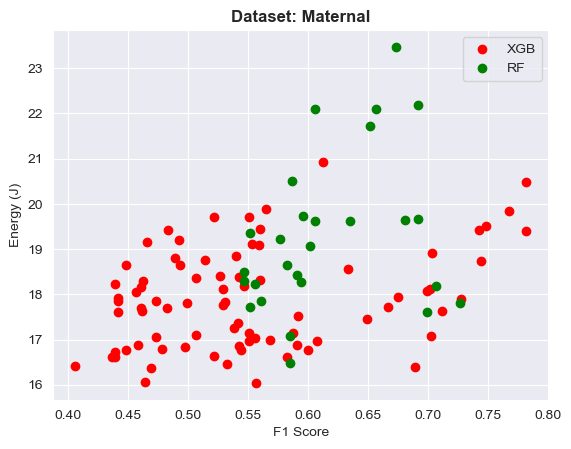

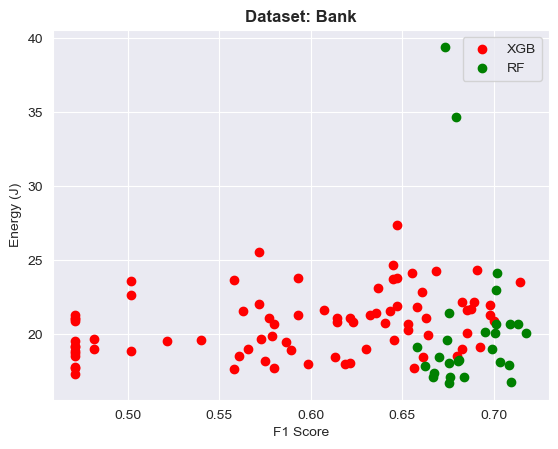

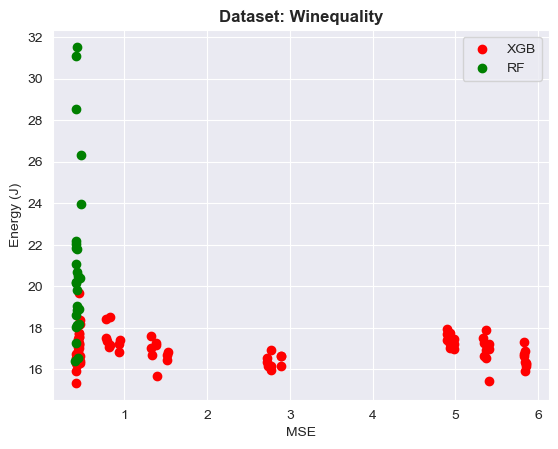

In [8]:
all_df = pd.concat(dfs)

for dataset_name in ['maternal', 'bank', 'winequality']:
    
    if 'winequality' in dataset_name:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
        
    plt.figure()
    curr_df = all_df[all_df['dataset'] == dataset_name]
    xgb_results = curr_df[curr_df['model'] == 'xgb']
    rf_results = curr_df[curr_df['model'] == 'rf']
    
    plt.scatter(xgb_results[metric], xgb_results['Energy (J)'], color='r', label='XGB')
    plt.scatter(rf_results[metric], rf_results['Energy (J)'], color='g', label='RF')
    plt.ylabel('Energy (J)')
    plt.xlabel(metric)
    plt.legend()
    plt.title('Dataset: {0}'.format(dataset_name.capitalize()), weight='bold')
    plt.show()
    #plt.savefig('loveland_imgs/{0}_rf_vs_xgb.png'.format(dataset_name))

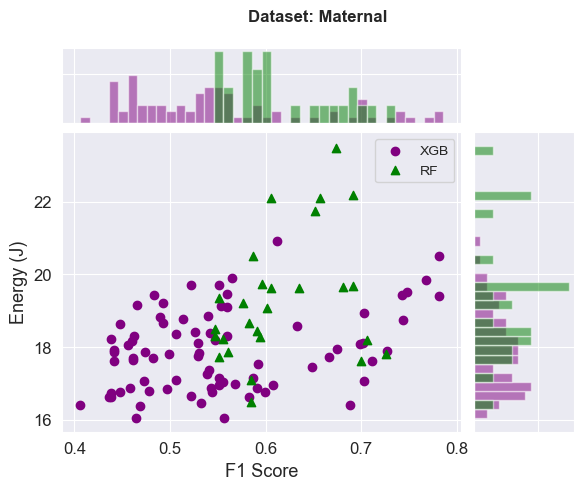

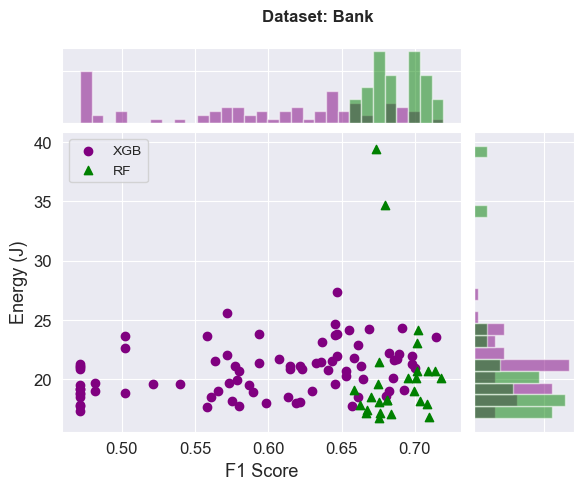

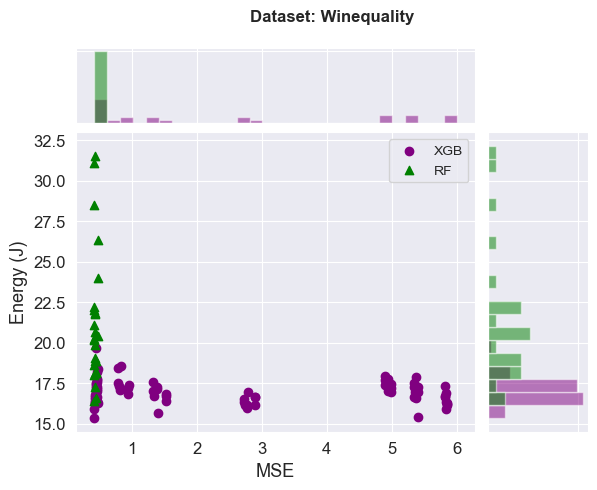

In [32]:
all_df = pd.concat(dfs)

for dataset_name in ['maternal', 'bank', 'winequality']:
    
    if 'winequality' in dataset_name:
        metric = 'MSE'
    else:
        metric = 'F1 Score'
        
    curr_df = all_df[all_df['dataset'] == dataset_name]
    xgb_results = curr_df[curr_df['model'] == 'xgb']
    rf_results = curr_df[curr_df['model'] == 'rf']
    
    
    fig = plt.figure()
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[1, 0])
    ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    
    #plt.savefig('loveland_imgs/{0}_rf_vs_xgb.png'.format(dataset_name))
    
    
    # no labels
    
    # the scatter plot:
    ax.scatter(xgb_results[metric], xgb_results['Energy (J)'], color='purple', label='XGB')
    ax.scatter(rf_results[metric], rf_results['Energy (J)'], color='green', label='RF', marker='^')
    
    # now determine nice limits by hand:
    #binwidth = 0.25
    #xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    perf_results = list(xgb_results[metric]) + list(rf_results[metric])
    energy_results = list(xgb_results['Energy (J)']) + list(rf_results['Energy (J)'])
  
    if dataset_name == 'maternal':
        x_binwidth = 0.01
        y_binwidth = 0.25
    elif dataset_name == 'bank':
        x_binwidth = 0.008
        y_binwidth = 1
    else:
        x_binwidth = 0.2
        y_binwidth = 0.8
    x_bins = np.arange(min(perf_results), max(perf_results) + x_binwidth, x_binwidth)
    y_bins = np.arange(min(energy_results), max(energy_results) + y_binwidth, y_binwidth)
 

    ax_histx.hist(xgb_results[metric], bins=x_bins, color='purple', alpha=0.5, density=True)
    ax_histx.hist(rf_results[metric], bins=x_bins, color='green', alpha=0.5, density=True)
    ax_histy.hist(xgb_results['Energy (J)'], bins=y_bins, color='purple', orientation='horizontal', alpha=0.5, density=True)
    ax_histy.hist(rf_results['Energy (J)'], bins=y_bins, color='green', orientation='horizontal', alpha=0.5, density=True)
    
    ax_histx.tick_params(axis="x", labelbottom=False, labelleft=False, labeltop=False, labelright=False, \
                         top=False, bottom=False, left=False, right=False)
    ax_histy.tick_params(axis="y", labelleft=False, labelbottom=False, labeltop=False, labelright=False)
    ax_histx.set_yticklabels([])
    ax_histy.set_xticklabels([])
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylabel('Energy (J)', fontsize=13)
    ax.set_xlabel(metric, fontsize=13)
    ax.legend()
    plt.suptitle('Dataset: {0}'.format(dataset_name.capitalize()), weight='bold')
    plt.savefig('loveland_imgs/{0}_rf_vs_xgb.png'.format(dataset_name))